In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
data = pd.read_csv("data.csv")

In [ ]:
time.sleep(5)

In [ ]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"


In [4]:
data.replace("?",np.nan, inplace = True)
data = data.astype({"age": np.float64, "fare":np.float64})

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#raise Exception("You have encountered an error")

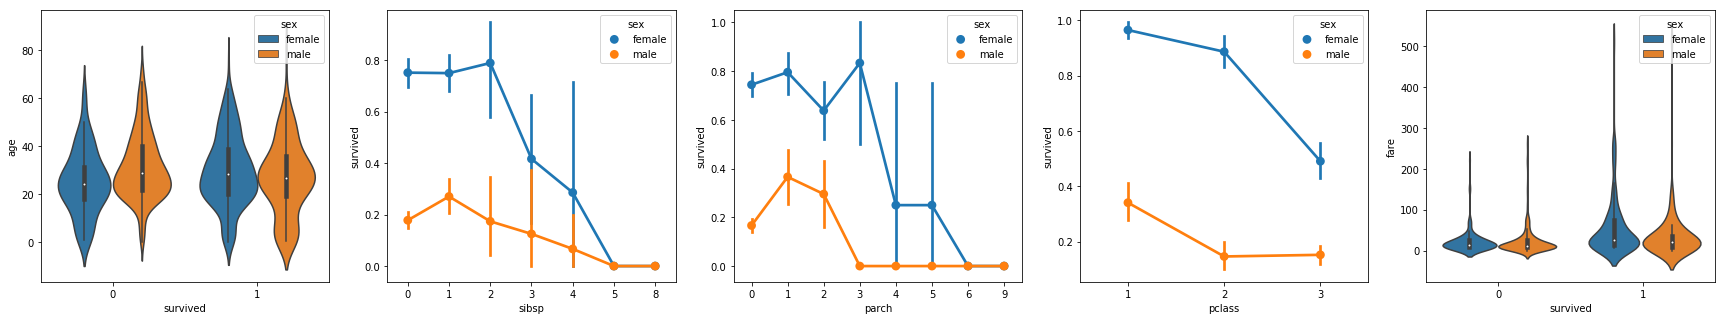

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [7]:
data.replace({'male': 1, 'female':0}, inplace = True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [8]:
data["relatives"] = data.apply (lambda row: int((row['sibsp'] + row['parch'])>0), axis = 1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [9]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

/home/nbuser/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/nbuser/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [15]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
640/836 [=====================>........] - ETA: 0s - loss: 0.6926 - acc: 0.5734

836/836 [==============================] - 2s 2ms/step - loss: 0.6921 - acc: 0.5909


Epoch 2/50
836/836 [==============================] - 1s 710us/step - loss: 0.6893 - acc: 0.5861


Epoch 3/50
836/836 [==============================] - 0s 481us/step - loss: 0.6830 - acc: 0.5861


Epoch 4/50
 32/836 [>.............................] - ETA: 0s - loss: 0.6795 - acc: 0.5938

836/836 [==============================] - 0s 588us/step - loss: 0.6707 - acc: 0.6029
Epoch 5/50
 32/836 [>.............................] - ETA: 0s - loss: 0.6715 - acc: 0.5625

836/836 [==============================] - 0s 479us/step - loss: 0.6496 - acc: 0.7117
Epoch 6/50
 96/836 [==>...........................] - ETA: 0s - loss: 0.6477 - acc: 0.7292



836/836 [==============================] - 0s 597us/step - loss: 0.6207 - acc: 0.7560
Epoch 7/50
224/836 [=======>......................] - ETA: 0s - loss: 0.6000 - acc: 0.7857

836/836 [==============================] - 0s 592us/step - loss: 0.5883 - acc: 0.7656
Epoch 8/50
256/836 [========>.....................] - ETA: 0s - loss: 0.5699 - acc: 0.7812

836/836 [==============================] - 1s 599us/step - loss: 0.5581 - acc: 0.7691
Epoch 9/50
256/836 [========>.....................] - ETA: 0s - loss: 0.5375 - acc: 0.7695

836/836 [==============================] - 0s 508us/step - loss: 0.5340 - acc: 0.7667
Epoch 10/50
 32/836 [>.............................] - ETA: 0s - loss: 0.4996 - acc: 0.8125

836/836 [==============================] - 1s 612us/step - loss: 0.5158 - acc: 0.7691
Epoch 11/50
 32/836 [>.............................] - ETA: 0s - loss: 0.4282 - acc: 0.8438

836/836 [==============================] - 1s 703us/step - loss: 0.5028 - acc: 0.7691


Epoch 12/50
836/836 [==============================] - 0s 491us/step - loss: 0.4932 - acc: 0.7739
Epoch 13/50
224/836 [=======>......................] - ETA: 0s - loss: 0.4808 - acc: 0.7991

608/836 [====================>.........] - ETA: 0s - loss: 0.4767 - acc: 0.7895

836/836 [==============================] - 1s 713us/step - loss: 0.4875 - acc: 0.7787
Epoch 14/50
836/836 [==============================] - 0s 593us/step - loss: 0.4827 - acc: 0.7799


Epoch 15/50
544/836 [==================>...........] - ETA: 0s - loss: 0.4708 - acc: 0.7868

836/836 [==============================] - 0s 586us/step - loss: 0.4784 - acc: 0.7823
Epoch 16/50
836/836 [==============================] - 0s 479us/step - loss: 0.4750 - acc: 0.7835


Epoch 17/50
836/836 [==============================] - 1s 602us/step - loss: 0.4722 - acc: 0.7847


Epoch 18/50
836/836 [==============================] - 0s 471us/step - loss: 0.4702 - acc: 0.7859
Epoch 19/50
 96/836 [==>...........................] - ETA: 0s - loss: 0.3891 - acc: 0.8542

836/836 [==============================] - 0s 368us/step - loss: 0.4679 - acc: 0.7871
Epoch 20/50
608/836 [====================>.........] - ETA: 0s - loss: 0.4545 - acc: 0.7928

836/836 [==============================] - 0s 500us/step - loss: 0.4657 - acc: 0.7883
Epoch 21/50
704/836 [========================>.....] - ETA: 0s - loss: 0.4689 - acc: 0.7812

836/836 [==============================] - 1s 607us/step - loss: 0.4635 - acc: 0.7859
Epoch 22/50
448/836 [===============>..............] - ETA: 0s - loss: 0.4472 - acc: 0.7768

836/836 [==============================] - 1s 703us/step - loss: 0.4617 - acc: 0.7847
Epoch 23/50
512/836 [=================>............] - ETA: 0s - loss: 0.4367 - acc: 0.7949

836/836 [==============================] - 0s 492us/step - loss: 0.4600 - acc: 0.7811
Epoch 24/50
352/836 [===========>..................] - ETA: 0s - loss: 0.4358 - acc: 0.7955

836/836 [==============================] - 0s 595us/step - loss: 0.4582 - acc: 0.7871
Epoch 25/50
640/836 [=====================>........] - ETA: 0s - loss: 0.4382 - acc: 0.7969

836/836 [==============================] - 0s 478us/step - loss: 0.4569 - acc: 0.7859
Epoch 26/50
544/836 [==================>...........] - ETA: 0s - loss: 0.4529 - acc: 0.7868

836/836 [==============================] - 0s 586us/step - loss: 0.4557 - acc: 0.7859
Epoch 27/50
480/836 [================>.............] - ETA: 0s - loss: 0.4344 - acc: 0.8000

836/836 [==============================] - 1s 723us/step - loss: 0.4548 - acc: 0.7883
Epoch 28/50
224/836 [=======>......................] - ETA: 0s - loss: 0.4702 - acc: 0.7857

836/836 [==============================] - 0s 478us/step - loss: 0.4543 - acc: 0.7835
Epoch 29/50
544/836 [==================>...........] - ETA: 0s - loss: 0.4643 - acc: 0.7849

836/836 [==============================] - 1s 693us/step - loss: 0.4533 - acc: 0.7871
Epoch 30/50
384/836 [============>.................] - ETA: 0s - loss: 0.4721 - acc: 0.7839

836/836 [==============================] - 1s 603us/step - loss: 0.4525 - acc: 0.7919
Epoch 31/50
160/836 [====>.........................] - ETA: 0s - loss: 0.4028 - acc: 0.8125

836/836 [==============================] - 1s 610us/step - loss: 0.4518 - acc: 0.7919
Epoch 32/50
288/836 [=========>....................] - ETA: 0s - loss: 0.4764 - acc: 0.7604

836/836 [==============================] - 0s 496us/step - loss: 0.4509 - acc: 0.7895
Epoch 33/50
576/836 [===================>..........] - ETA: 0s - loss: 0.4428 - acc: 0.7899

836/836 [==============================] - 0s 473us/step - loss: 0.4500 - acc: 0.7907
Epoch 34/50
480/836 [================>.............] - ETA: 0s - loss: 0.4652 - acc: 0.7792

836/836 [==============================] - 0s 591us/step - loss: 0.4493 - acc: 0.7907
Epoch 35/50
576/836 [===================>..........] - ETA: 0s - loss: 0.4209 - acc: 0.8038

836/836 [==============================] - 0s 481us/step - loss: 0.4493 - acc: 0.7883
Epoch 36/50
736/836 [=========================>....] - ETA: 0s - loss: 0.4441 - acc: 0.7948

836/836 [==============================] - 0s 480us/step - loss: 0.4486 - acc: 0.7907
Epoch 37/50
 32/836 [>.............................] - ETA: 0s - loss: 0.5237 - acc: 0.7188

836/836 [==============================] - 0s 483us/step - loss: 0.4484 - acc: 0.7955
Epoch 38/50
 64/836 [=>............................] - ETA: 2s - loss: 0.4124 - acc: 0.8438

448/836 [===============>..............] - ETA: 0s - loss: 0.4650 - acc: 0.7746

836/836 [==============================] - 1s 1ms/step - loss: 0.4482 - acc: 0.7859
Epoch 39/50
672/836 [=======================>......] - ETA: 0s - loss: 0.4566 - acc: 0.7842

836/836 [==============================] - 0s 374us/step - loss: 0.4469 - acc: 0.7931
Epoch 40/50
836/836 [==============================] - 0s 382us/step - loss: 0.4466 - acc: 0.7895


Epoch 41/50
836/836 [==============================] - 0s 470us/step - loss: 0.4464 - acc: 0.7895
Epoch 42/50
416/836 [=============>................] - ETA: 0s - loss: 0.4409 - acc: 0.7909

836/836 [==============================] - 1s 600us/step - loss: 0.4458 - acc: 0.7871
Epoch 43/50
 32/836 [>.............................] - ETA: 0s - loss: 0.3059 - acc: 0.9062

836/836 [==============================] - 0s 597us/step - loss: 0.4459 - acc: 0.7871
Epoch 44/50
128/836 [===>..........................] - ETA: 0s - loss: 0.4735 - acc: 0.7812

836/836 [==============================] - 1s 611us/step - loss: 0.4453 - acc: 0.7871
Epoch 45/50
 32/836 [>.............................] - ETA: 0s - loss: 0.4956 - acc: 0.7188

836/836 [==============================] - 0s 574us/step - loss: 0.4453 - acc: 0.7871
Epoch 46/50
160/836 [====>.........................] - ETA: 0s - loss: 0.4549 - acc: 0.7875

836/836 [==============================] - 1s 608us/step - loss: 0.4449 - acc: 0.7883
Epoch 47/50
 96/836 [==>...........................] - ETA: 0s - loss: 0.4277 - acc: 0.7917

836/836 [==============================] - 0s 581us/step - loss: 0.4449 - acc: 0.7883
Epoch 48/50
352/836 [===========>..................] - ETA: 0s - loss: 0.4066 - acc: 0.8068

836/836 [==============================] - 0s 492us/step - loss: 0.4449 - acc: 0.7955
Epoch 49/50
 64/836 [=>............................] - ETA: 1s - loss: 0.4324 - acc: 0.8125

836/836 [==============================] - 0s 485us/step - loss: 0.4448 - acc: 0.7919
Epoch 50/50
416/836 [=============>................] - ETA: 0s - loss: 0.4155 - acc: 0.8101

836/836 [==============================] - 0s 590us/step - loss: 0.4445 - acc: 0.7919


In [18]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7894736842105263
